In [ ]:
from cgeniepy.core import GenieModel
import matplotlib.pyplot as plt

def dEP(lgm_path, hol_path, gem='ecogem'):

    hol = GenieModel(hol_path)
    lgm =  GenieModel(lgm_path)

    ## ecogem
    if gem=='ecogem':
        diff = lgm.select_var("eco2D_Uptake_Fluxes_C") - hol.select_var("eco2D_Uptake_Fluxes_C")
        # mmol C m-3 d-1 to g C m-2 yr-1
        diff.array = diff.array * 12 / 1000 * 80.8 * 365
    elif gem == 'biogem':
        diff = lgm.select_var("bio_export_POC") - hol.select_var("bio_export_POC")
        diff.array = diff.array * 12    

    vmax = diff.array.max().values
    vmin = vmax * -1        

    diff.unit = r"Export Production anamolies (g C m$^{-2}$ yr$^{-1}$)"
    diff.plot_map()

dEP("../model/LGM_biogem", "../model/Hol_biogem", 'biogem')    

In [ ]:
from cgeniepy.core import GenieModel

def dEP(lgm_path, hol_path, pft,  *args, **kwargs):

    hol = GenieModel(hol_path)
    lgm =  GenieModel(lgm_path)

    ## ecogem
    diff = lgm.select_pft(start=pft, end=pft) - hol.select_pft(start=pft, end=pft)
    print(diff.select_basin("EAO").mean().values)
    vmax = diff.nanmax()
    vmin = vmax * -1    
    diff.plot_map(cmap="RdBu_r", vmax=vmax, vmin=vmin, *args, **kwargs)

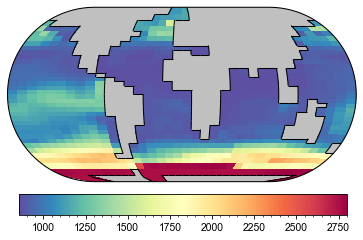

In [19]:
from geniepy.core import GenieModel

l = GenieModel("../model/LGM_NPD")

x = l.select_var("bio_export_POP")/l.select_var("bio_export_POFe")
x.plot_map()

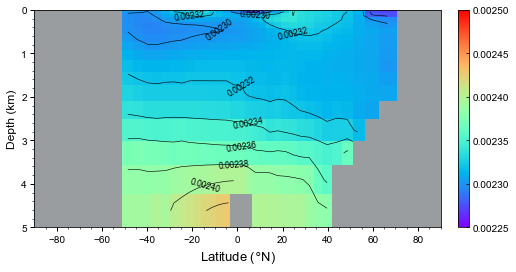

In [19]:
from geniepy.core import GenieModel
x = GenieModel("../model/Hol_8P8Z/")
x.select_var("ocn_ALK").mask_basin('GIteiiaa', basin='Atlantic', basin_lvl="").mean_along("lon").cross_section(cmap='rainbow', vmin=0.00225, vmax=0.0025)

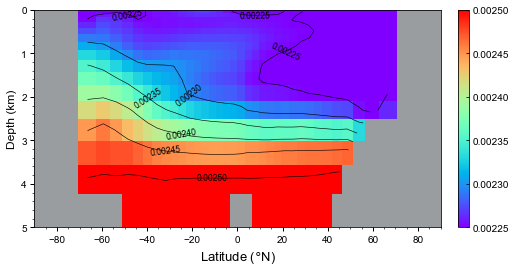

In [20]:
x = GenieModel("../model/LGM_biogem/")
x.select_var("ocn_ALK").mask_basin('GIteiiaa', basin='Atlantic', basin_lvl="ALL").mean_along("lon").cross_section(cmap='rainbow', vmin=0.00225, vmax=0.0025)

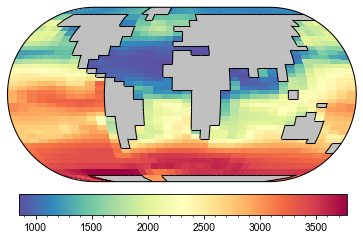

In [18]:
h = GenieModel("../model/Hol_NPD")

x = h.select_var("bio_export_POP")/h.select_var("bio_export_POFe")
x.plot_map()

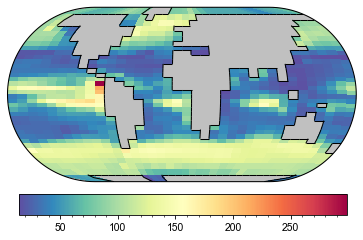

In [178]:
x = GenieModel("../model/Hol_8P8Z/").select_var("eco2D_Uptake_Fluxes_C")
x.array = x.array * 12 / 1000 * 80.8 * 365
x.plot_map()

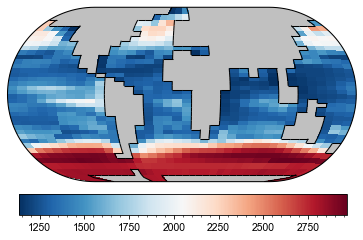

In [16]:
ce = GenieModel("../model/LGM_8P8Z").select_var('bio_export_POP')
cb = GenieModel("../model/LGM_biogem").select_var('bio_export_POP')
pe = GenieModel("../model/LGM_8P8Z").select_var('bio_export_POFe')
pb = GenieModel("../model/LGM_biogem").select_var('bio_export_POFe')

diff = (ce/pe)#/(cb/pb)
diff.plot_map(cmap="RdBu_r")

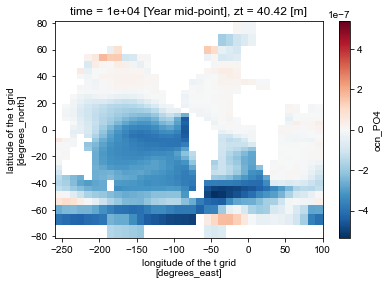

In [139]:
GenieModel("../model/LGM_biogem").diff('../model/Hol_biogem', 'ocn_PO4').array[0,:,:].plot()

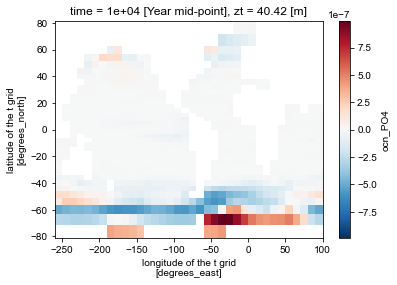

In [138]:
GenieModel("../model/LGM_8P8Z").diff('../model/Hol_8P8Z', 'ocn_PO4').array[0,:,:].plot()

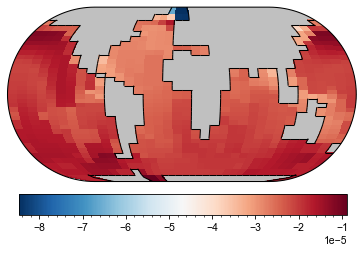

In [144]:
GenieModel("../model/LGM_8P8Z").diff('../model/LGM_biogem', 'ocn_ben_O2').plot_map(cmap="RdBu_r")

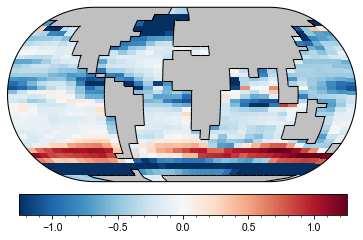

In [116]:
GenieModel("../model/LGM_biogem").diff('../model/Hol_biogem', 'bio_export_POC').plot_map()

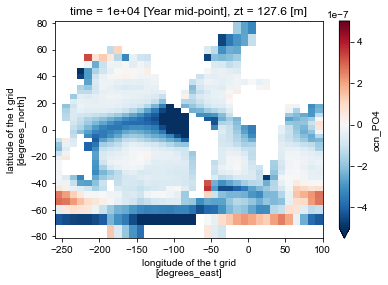

In [53]:
GenieModel("../model/LGM_8P8Z").diff('../model/Hol_8P8Z', 'ocn_PO4').array[1,:,:].plot(vmin=-5e-7, vmax=5e-7, cmap='RdBu_r')

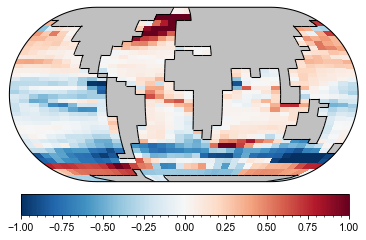

In [65]:
x = GenieModel("../model/LGM_8P8Z").diff('../model/Hol_8P8Z', 'bio_export_POC')
y = GenieModel("../model/LGM_biogem").diff('../model/Hol_biogem', 'bio_export_POC')

(x - y).plot_map(cmap='RdBu_r', vmin=-1, vmax=1)

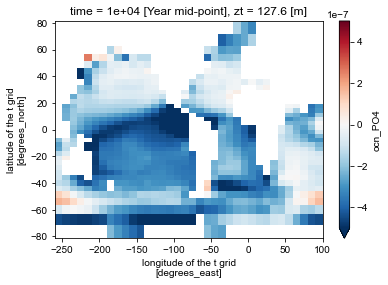

In [52]:
# less remin PO4?
GenieModel("../model/LGM_biogem").diff('../model/Hol_biogem', 'ocn_PO4').array[1,:,:].plot(vmin=-5e-7, vmax=5e-7, cmap='RdBu_r')

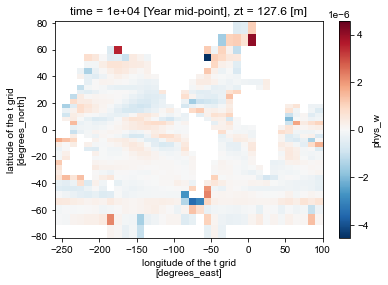

In [56]:
GenieModel("../model/LGM_biogem").diff('../model/Hol_biogem', 'phys_w').array[1,:,:].plot()

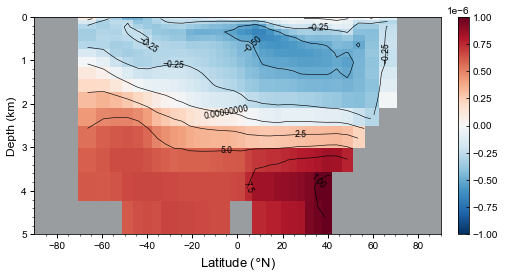

In [55]:
GenieModel("../model/LGM_biogem").diff('../model/Hol_biogem', 'ocn_PO4').mask_basin('GIteiiaa', basin='Atlantic', basin_lvl="ALL").mean_along("lon").cross_section( cmap='RdBu_r',  vmin=-1e-6, vmax=1e-6)

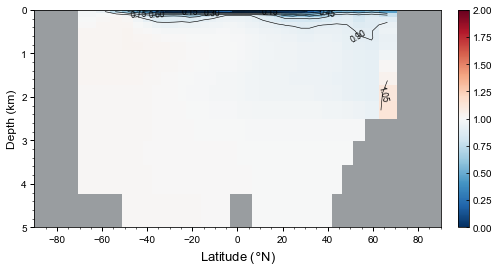

In [44]:
GenieModel("../model/LGM_8P8Z").div("../model/LGM_biogem", 'ocn_PO4').mask_basin('GIteiiaa', basin='Atlantic', basin_lvl="ALL").mean_along("lon").cross_section(cmap="RdBu_r", vmin=0, vmax=2)

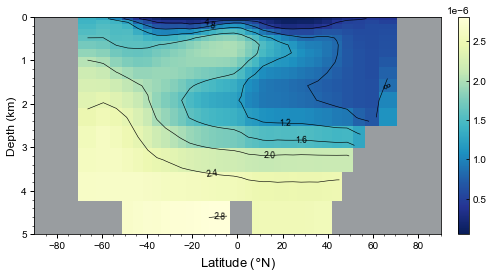

In [40]:
.select_var('ocn_PO4').mask_basin('GIteiiaa', basin='Atlantic', basin_lvl="ALL").mean_along("lon").cross_section()

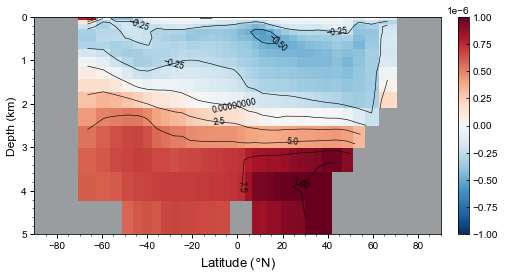

In [56]:
GenieModel("../model/LGM_8P8Z").diff('../model/Hol_8P8Z', 'ocn_PO4').mask_basin('GIteiiaa', basin='Atlantic', basin_lvl="ALL").mean_along("lon").cross_section( cmap='RdBu_r',  vmin=-1e-6, vmax=1e-6)

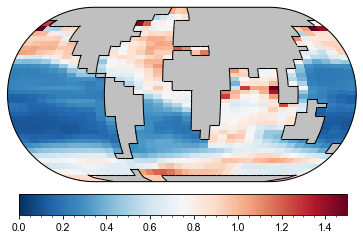

In [35]:
GenieModel("../model/LGM_Tremin_Tprod").div('../model/Hol_Tremin_Tprod', 'ocn_sur_PO4').plot_map(cmap='RdBu_r', vmin=0, vmax=1.5)

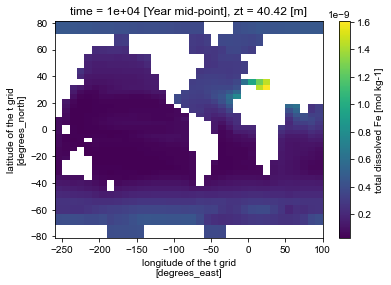

In [27]:
GenieModel("../model/Hol_biogem").select_var('ocn_TDFe').array[0,:,:].plot()

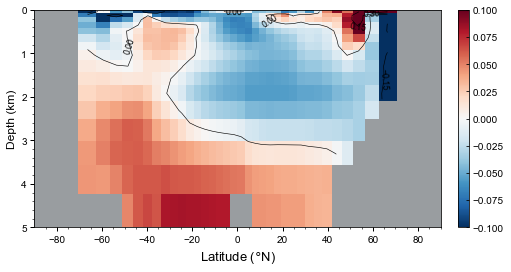

In [57]:
nonecology = GenieModel("../model/LGM_biogem").diff("../model/Hol_biogem", "ocn_DIC_13C")
#ecology = GenieModel("../model/LGM_Tremin_Tprod").diff("../model/Hol_Tremin_Tprod", "ocn_O2")
ecology = GenieModel("../model/LGM_8P8Z8M").diff("../model/Hol_8P8Z8M", "ocn_DIC_13C")

diff = ecology.mask_basin('GIteiiaa', basin="Atlantic", basin_lvl="ALL").mean_along("lon") - nonecology.mask_basin('GIteiiaa', basin="Atlantic", basin_lvl="ALL").mean_along("lon")

diff.cross_section(cmap=plt.get_cmap("RdBu_r"), vmin=-.1, vmax=.1)

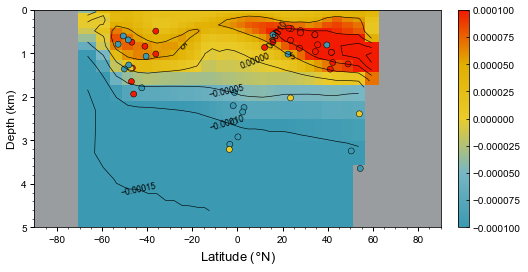

In [17]:
from geniepy.genie import GenieModel
from geniepy.plot import scatter_on_GENIE
import pandas as pd
import numpy as np
from geniepy.plot import genie_cmap

fig, ax = plt.subplots(figsize=(8, 4))

basin = 'Pacific'
odv = genie_cmap('Zissou1', reverse=False)
# plot model data
o2 = GenieModel("../model/LGM_8P8Z_Tremin").diff('../model/Hol_8P8Z_Tremin', 'ocn_O2')
o2.mask_basin('GIteiiaa', basin=basin, basin_lvl="ALL").mean_along("lon").cross_section(ax=ax, cmap=odv, vmin=-1e-4, vmax=1e-4)

# plot observed data
#data = pd.read_csv('../data/LGM_productivity/Galbraith&Jaccard_2015.csv')
#data['delta'] = np.sign(data['LGM-Hol'])

# data with only 15N are removed
#data = pd.read_csv('../data/LGM_productivity/Jaccard&Galbraith_2012.csv')
#data['delta'] = data['Hol-LGM'] * -1

data = pd.read_csv('../data/LGM_productivity/Kobayashi_etal_2021.csv')
data['basin'] = data.apply(lambda x: detect_ocean(x.Longitude, x.Latitude), axis=1)

data['Depth'] = data['Depth']/1000
#data['Delta_O2'] = data['Delta_O2']/1E6 #from umol/kg to mol/kg

data = data[data['Type'] == 'Qualitative']
data = data[data['basin'].str.contains(r'Pacific')]

ax.scatter(x=data.Latitude, y=data.Depth, c=data.Delta_O2, cmap=odv, edgecolor='black', linewidth=.5, vmin=-1e-4, vmax=1e-4)

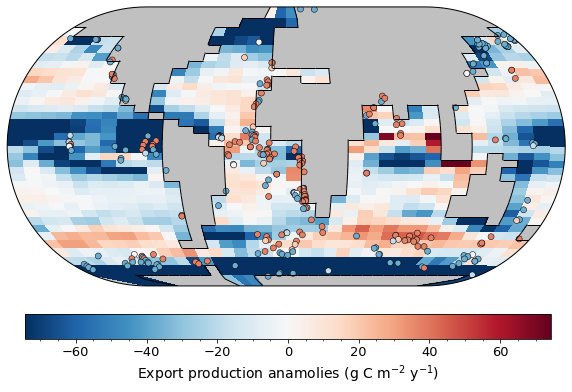

In [1]:
from geniepy.core import GenieModel
from geniepy.plot import plot_GENIE, scatter_on_GENIE
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt

def dEP(lgm_path, hol_path, gem='ecogem'):

    hol = GenieModel(hol_path)
    lgm =  GenieModel(lgm_path)

    ## ecogem
    if gem=='ecogem':
        diff = lgm.select_var("eco2D_Uptake_Fluxes_C") - hol.select_var("eco2D_Uptake_Fluxes_C")
        # mmol C m-3 d-1 to g C m-2 yr-1
        diff.array = diff.array * 12 / 1000 * 80.8 * 365
    elif gem == 'biogem':
        diff = lgm.select_var("bio_export_POC") - hol.select_var("bio_export_POC")
        diff.array = diff.array * 12    

    diff.unit = r"Export Production anamolies (g C m$^{-2}$ yr$-1$)"

    return diff
    
#diff = dEP('../model/LGM_biogem', "../model/Hol_biogem", "biogem")
diff = dEP('../model/LGM_8P8Z_Tremin', "../model/Hol_8P8Z_Tremin", "ecogem")
obs = pd.read_csv("../data/LGM_productivity/combined_data.csv")

vmax = diff.array.max().values
vmin = vmax * -1

fig, ax = plt.subplots(figsize=(10,7), subplot_kw=dict(projection=ccrs.EckertIV()))
p = plot_GENIE(ax, data=diff.array, vmin=vmin/2, vmax=vmax/2, cmap = plt.get_cmap("RdBu_r"))
obs['Productivity_anomlies'] = obs['Productivity_anomlies'] * vmax/2
p = scatter_on_GENIE(ax, obs, "Productivity_anomlies", vmin=vmin, vmax=vmax, cmap = plt.get_cmap("RdBu_r"))

cax = fig.add_axes([0.15, 0.12, 0.73, 0.05]) #xmin, ymin, dx, dy
cbar = fig.colorbar(p, cax = cax, orientation = 'horizontal', pad=0.04)
cbar.ax.tick_params(labelsize=13)
cbar.minorticks_on()
cbar.set_label(r"Export production anamolies (g C m$^{-2}$ y$^{-1}$)", size=14)
#plt.savefig("../output/LGM_NPP_anomly.jpg", dpi=300)

## SST difference

In [1]:
from cgeniepy.core import GenieModel as GM

x = GM("../model/LGM_13P13Z/")
x.select_pft(var="export").plot_map()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'GenieArray':[0m [1m[1mCannot determine Numba type of <class 'type'>[0m
[1m
File "../../cgeniepy/src/cgeniepy/core.py", line 778:[0m
[1m    def select_pft(self, start=None, end=None, var="biomass"):
        <source elided>
        # return
[1m        x = GenieArray()
[0m        [1m^[0m[0m
[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'cgeniepy.core.GenieModel'>[0m
